# Assignment #1 Fingerprint Recognition

- Downloaded the NSIB software (test with `mindtct`)
- Manual available here: https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nistir7392.pdf
- Selected 2 fingerprint datasets from http://bias.csr.unibo.it/fvc2002/download.asp (capacitive sensor DB 3 and synthetic DB 4)

Transform the images from TIFF to PNG

In [2]:
import subprocess
import os

tif_dir = ["DB2_B", "DB3_B", "DB4_B"]
png_dir = ["DB2_PNG", "DB3_PNG", "DB4_PNG"]

for d in png_dir:
    os.makedirs(d, exist_ok=True)

for tif_d, png_d in zip(tif_dir, png_dir):
    for f in os.listdir(tif_d):
        if f.endswith(".tif"):
            tif_path = os.path.join(tif_d, f)
            png_path = os.path.join(png_d, f.replace(".tif", ".png"))
            result = subprocess.run(["magick", tif_path, png_path], capture_output=True, text=True)

            if result.returncode != 0:
                print(f"Error converting {tif_path}: {result.stderr}")
            else:
                print(f"Converted {tif_path} to {png_path}")

Converted DB2_B\101_1.tif to DB2_PNG\101_1.png
Converted DB2_B\101_2.tif to DB2_PNG\101_2.png
Converted DB2_B\101_3.tif to DB2_PNG\101_3.png
Converted DB2_B\101_4.tif to DB2_PNG\101_4.png
Converted DB2_B\101_5.tif to DB2_PNG\101_5.png
Converted DB2_B\101_6.tif to DB2_PNG\101_6.png
Converted DB2_B\101_7.tif to DB2_PNG\101_7.png
Converted DB2_B\101_8.tif to DB2_PNG\101_8.png
Converted DB2_B\102_1.tif to DB2_PNG\102_1.png
Converted DB2_B\102_2.tif to DB2_PNG\102_2.png
Converted DB2_B\102_3.tif to DB2_PNG\102_3.png
Converted DB2_B\102_4.tif to DB2_PNG\102_4.png
Converted DB2_B\102_5.tif to DB2_PNG\102_5.png
Converted DB2_B\102_6.tif to DB2_PNG\102_6.png
Converted DB2_B\102_7.tif to DB2_PNG\102_7.png
Converted DB2_B\102_8.tif to DB2_PNG\102_8.png
Converted DB2_B\103_1.tif to DB2_PNG\103_1.png
Converted DB2_B\103_2.tif to DB2_PNG\103_2.png
Converted DB2_B\103_3.tif to DB2_PNG\103_3.png
Converted DB2_B\103_4.tif to DB2_PNG\103_4.png
Converted DB2_B\103_5.tif to DB2_PNG\103_5.png
Converted DB2

Compute minutiae points for all the images

In [3]:
out_dir = "out"

for d in png_dir:
    for f in os.listdir(d):
        if f.endswith(".png"):
            png_path = os.path.join(d, f)
            out_path = os.path.join(out_dir, d, os.path.splitext(f)[0])
            os.makedirs(os.path.dirname(out_path), exist_ok=True)
            result = subprocess.run(["mindtct", png_path, out_path], capture_output=True, text=True)

            if result.returncode != 0:
                print(f"Error processing {png_path}: {result.stderr}")
            else:
                print(f"Processed {png_path}, output in {out_path}")

Processed DB2_PNG\101_1.png, output in out\DB2_PNG\101_1
Processed DB2_PNG\101_2.png, output in out\DB2_PNG\101_2
Processed DB2_PNG\101_3.png, output in out\DB2_PNG\101_3
Processed DB2_PNG\101_4.png, output in out\DB2_PNG\101_4
Processed DB2_PNG\101_5.png, output in out\DB2_PNG\101_5
Processed DB2_PNG\101_6.png, output in out\DB2_PNG\101_6
Processed DB2_PNG\101_7.png, output in out\DB2_PNG\101_7
Processed DB2_PNG\101_8.png, output in out\DB2_PNG\101_8
Processed DB2_PNG\102_1.png, output in out\DB2_PNG\102_1
Processed DB2_PNG\102_2.png, output in out\DB2_PNG\102_2
Processed DB2_PNG\102_3.png, output in out\DB2_PNG\102_3
Processed DB2_PNG\102_4.png, output in out\DB2_PNG\102_4
Processed DB2_PNG\102_5.png, output in out\DB2_PNG\102_5
Processed DB2_PNG\102_6.png, output in out\DB2_PNG\102_6
Processed DB2_PNG\102_7.png, output in out\DB2_PNG\102_7
Processed DB2_PNG\102_8.png, output in out\DB2_PNG\102_8
Processed DB2_PNG\103_1.png, output in out\DB2_PNG\103_1
Processed DB2_PNG\103_2.png, ou

Compute all the bozorth3 comparisons

In [4]:
import numpy as np

comparison_dir = "comparisons"
os.makedirs(comparison_dir, exist_ok=True)

for d in png_dir:
    files = os.listdir(os.path.join(out_dir, d))
    files = [f for f in files if f.endswith(".xyt")]
    n_files = len(files)

    similarity_matrix = np.zeros((n_files, n_files))
    for f1 in range(n_files):
        for f2 in range(n_files): # TODO symmetric speedup
            xyt1 = os.path.join(out_dir, d, files[f1])
            xyt2 = os.path.join(out_dir, d, files[f2])
            result = subprocess.run(["bozorth3", xyt1, xyt2], capture_output=True, text=True)

            if result.returncode != 0:
                print(f"Error comparing {xyt1} and {xyt2}: {result.stderr}")
            else:
                score = int(result.stdout.strip())
                similarity_matrix[f1, f2] = score
                print(f"Compared {xyt1} and {xyt2}, similarity score: {score}")

    np.savetxt(os.path.join(comparison_dir, f"{d}_similarity_matrix.txt"), similarity_matrix, fmt='%d')

Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_1.xyt, similarity score: 499
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_2.xyt, similarity score: 239
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_3.xyt, similarity score: 134
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_4.xyt, similarity score: 176
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_5.xyt, similarity score: 86
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_6.xyt, similarity score: 195
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_7.xyt, similarity score: 118
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\101_8.xyt, similarity score: 170
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\102_1.xyt, similarity score: 6
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\102_2.xyt, similarity score: 9
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\102_3.xyt, similarity score: 7
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\102_4.xyt, similarity score: 5
Compared out\DB2_PNG\101_1.xyt and out\DB2_PNG\10

Plot bozorth3 values for impostors and genuines on one graph

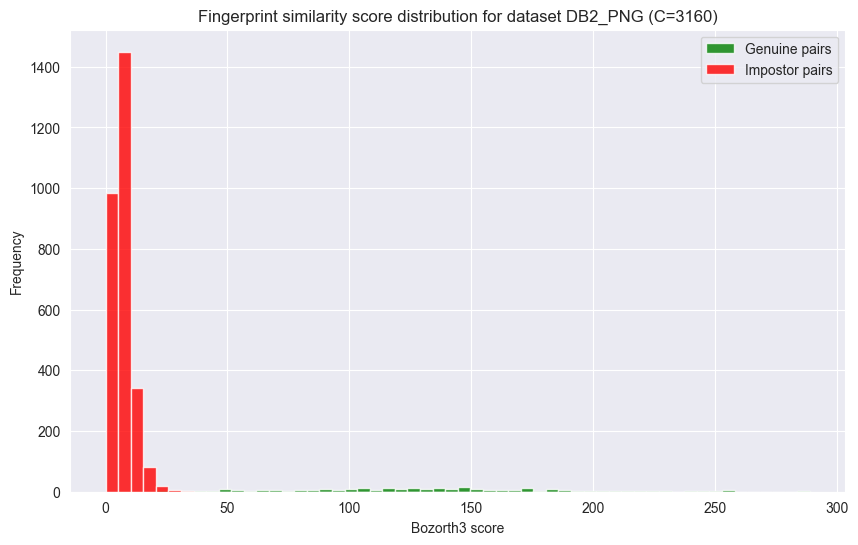

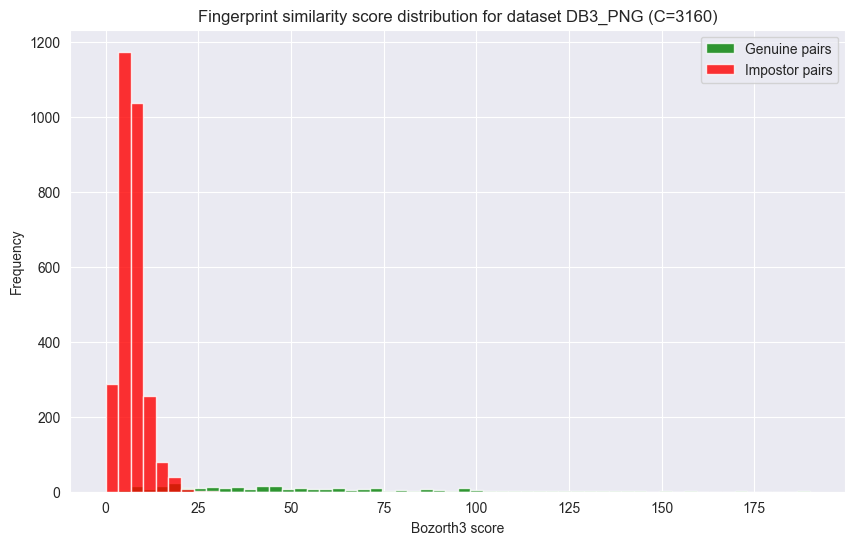

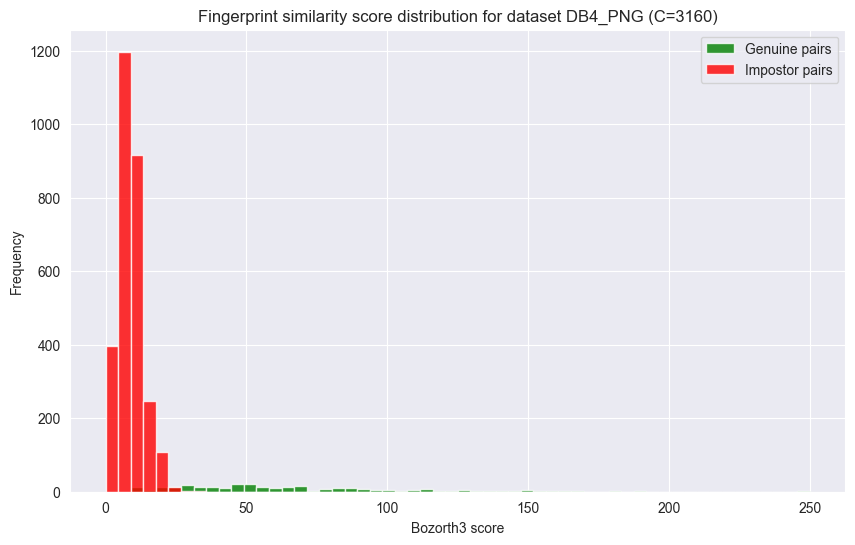

In [5]:
import math
import matplotlib.pyplot as plt

n_captures = 8
genuine_color = "green"
impostor_color = "red"

for d in png_dir:
    similarity_matrix = np.loadtxt(os.path.join(comparison_dir, f"{d}_similarity_matrix.txt"), dtype=int)
    n_files = similarity_matrix.shape[0]
    genuine_scores = []
    impostor_scores = []

    for i in range(n_files):
        for j in range(i + 1, n_files):
            if i // n_captures == j // n_captures:
                genuine_scores.append(similarity_matrix[i, j])
            else:
                impostor_scores.append(similarity_matrix[i, j])

    combined_scores = genuine_scores + impostor_scores
    n_scores = len(combined_scores)
    min_score = min(combined_scores)
    max_score = max(combined_scores)
    bins = np.linspace(min_score, max_score, math.ceil(math.sqrt(n_scores)))

    plt.figure(figsize=(10, 6))
    plt.hist(genuine_scores, bins=bins, alpha=0.8, color=genuine_color, label="Genuine pairs")
    plt.hist(impostor_scores, bins=bins, alpha=0.8, color=impostor_color, label="Impostor pairs")
    plt.title(f"Fingerprint similarity score distribution for dataset {d} (C={len(combined_scores)})")
    plt.xlabel("Bozorth3 score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

Plot the similarity matrix of all the comparisons

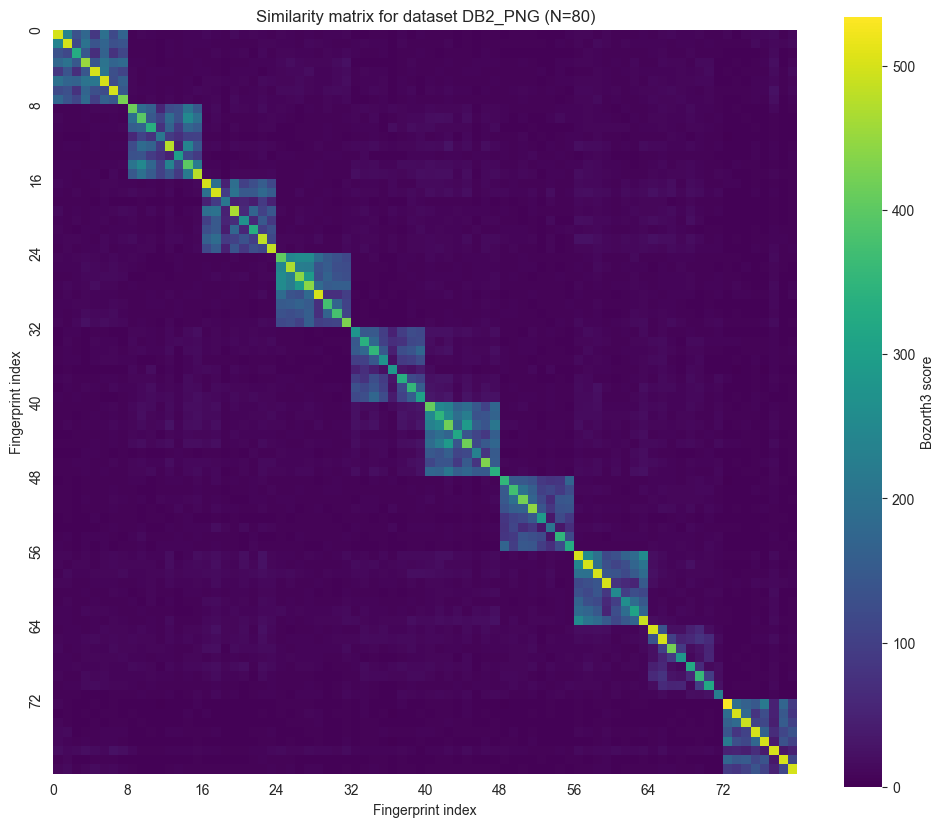

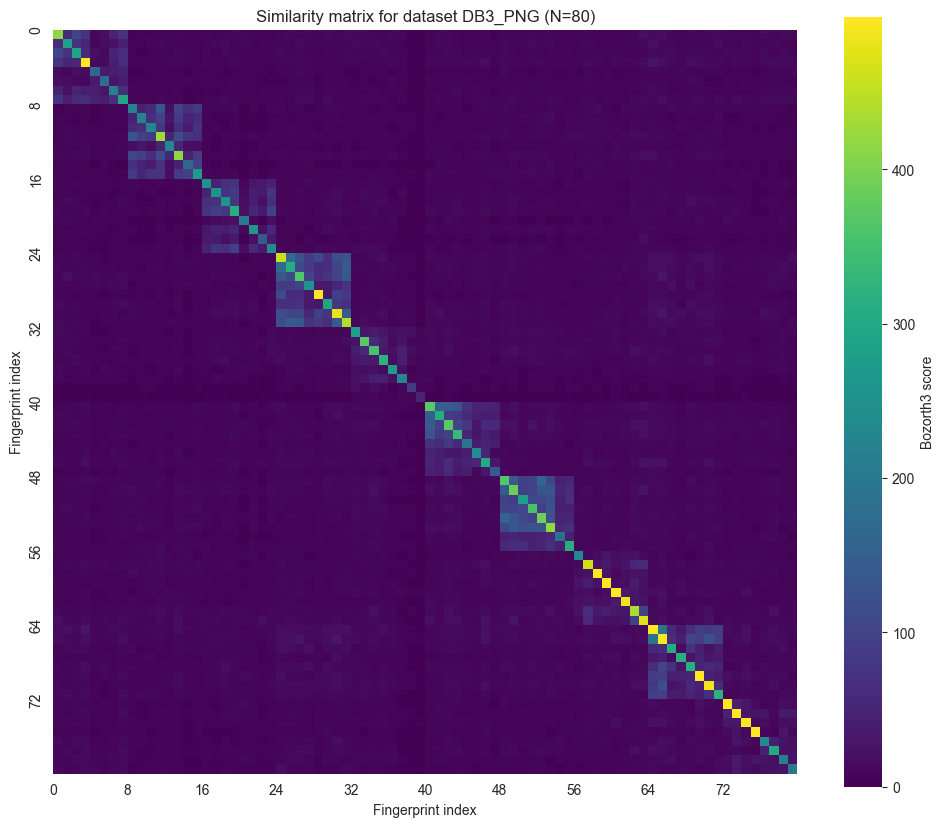

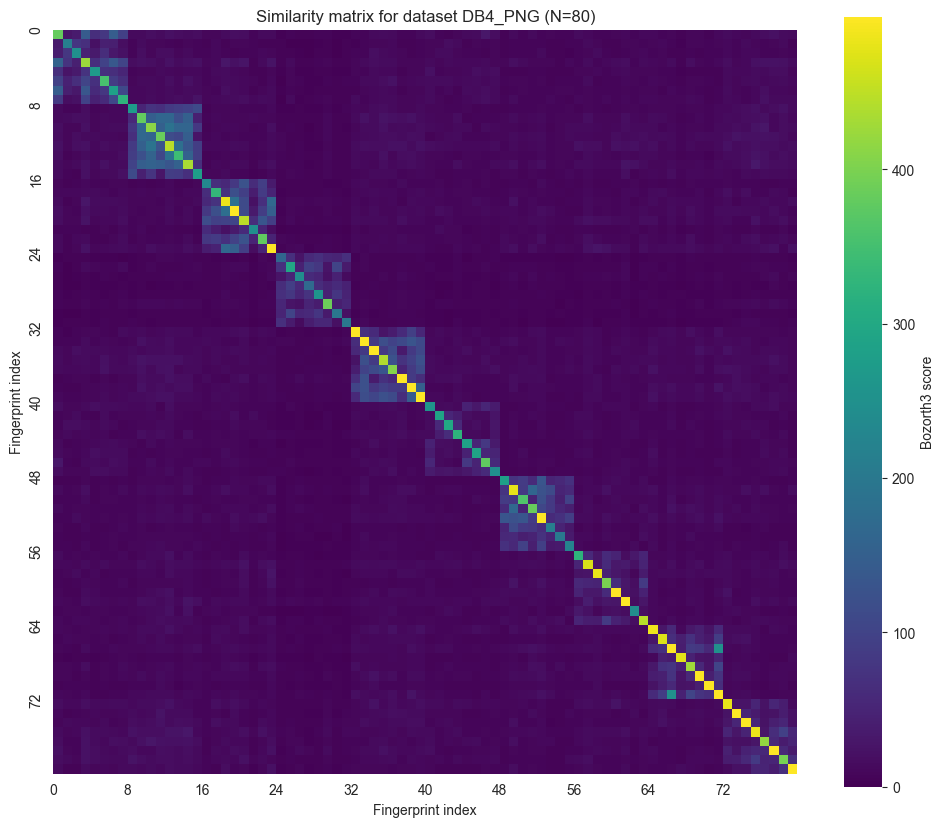

In [6]:
import seaborn as sns

for d in png_dir:
    similarity_matrix = np.loadtxt(os.path.join(comparison_dir, f"{d}_similarity_matrix.txt"), dtype=int)
    ticks = np.arange(0, similarity_matrix.shape[0], 8)

    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix, cmap="viridis", cbar_kws={'label': 'Bozorth3 score'}, square=True)
    plt.title(f"Similarity matrix for dataset {d} (N={similarity_matrix.shape[0]})")
    plt.xlabel("Fingerprint index")
    plt.ylabel("Fingerprint index")
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)
    plt.show()

Using nfiq (nfiq img.png), which givesyou an estimate of fingerprint quality (1 is best, 5 is worst), plot the quality values of the fingerprints.

Evaluated DB2_PNG\101_1.png, quality score: 1
Evaluated DB2_PNG\101_2.png, quality score: 1
Evaluated DB2_PNG\101_3.png, quality score: 2
Evaluated DB2_PNG\101_4.png, quality score: 1
Evaluated DB2_PNG\101_5.png, quality score: 1
Evaluated DB2_PNG\101_6.png, quality score: 1
Evaluated DB2_PNG\101_7.png, quality score: 2
Evaluated DB2_PNG\101_8.png, quality score: 2
Evaluated DB2_PNG\102_1.png, quality score: 1
Evaluated DB2_PNG\102_2.png, quality score: 1
Evaluated DB2_PNG\102_3.png, quality score: 2
Evaluated DB2_PNG\102_4.png, quality score: 2
Evaluated DB2_PNG\102_5.png, quality score: 2
Evaluated DB2_PNG\102_6.png, quality score: 1
Evaluated DB2_PNG\102_7.png, quality score: 1
Evaluated DB2_PNG\102_8.png, quality score: 2
Evaluated DB2_PNG\103_1.png, quality score: 1
Evaluated DB2_PNG\103_2.png, quality score: 1
Evaluated DB2_PNG\103_3.png, quality score: 2
Evaluated DB2_PNG\103_4.png, quality score: 2
Evaluated DB2_PNG\103_5.png, quality score: 2
Evaluated DB2_PNG\103_6.png, quali

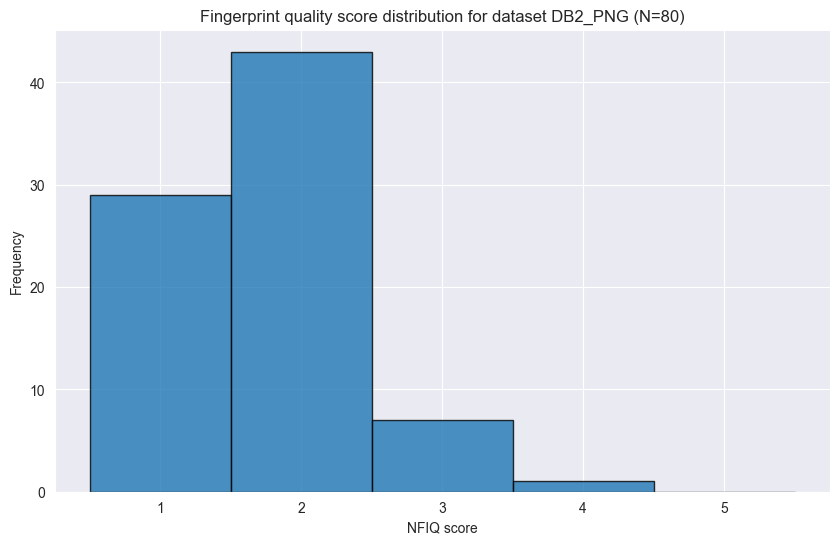

Evaluated DB3_PNG\101_1.png, quality score: 3
Evaluated DB3_PNG\101_2.png, quality score: 2
Evaluated DB3_PNG\101_3.png, quality score: 2
Evaluated DB3_PNG\101_4.png, quality score: 3
Evaluated DB3_PNG\101_5.png, quality score: 3
Evaluated DB3_PNG\101_6.png, quality score: 3
Evaluated DB3_PNG\101_7.png, quality score: 3
Evaluated DB3_PNG\101_8.png, quality score: 3
Evaluated DB3_PNG\102_1.png, quality score: 2
Evaluated DB3_PNG\102_2.png, quality score: 3
Evaluated DB3_PNG\102_3.png, quality score: 3
Evaluated DB3_PNG\102_4.png, quality score: 2
Evaluated DB3_PNG\102_5.png, quality score: 2
Evaluated DB3_PNG\102_6.png, quality score: 3
Evaluated DB3_PNG\102_7.png, quality score: 2
Evaluated DB3_PNG\102_8.png, quality score: 2
Evaluated DB3_PNG\103_1.png, quality score: 2
Evaluated DB3_PNG\103_2.png, quality score: 2
Evaluated DB3_PNG\103_3.png, quality score: 2
Evaluated DB3_PNG\103_4.png, quality score: 2
Evaluated DB3_PNG\103_5.png, quality score: 2
Evaluated DB3_PNG\103_6.png, quali

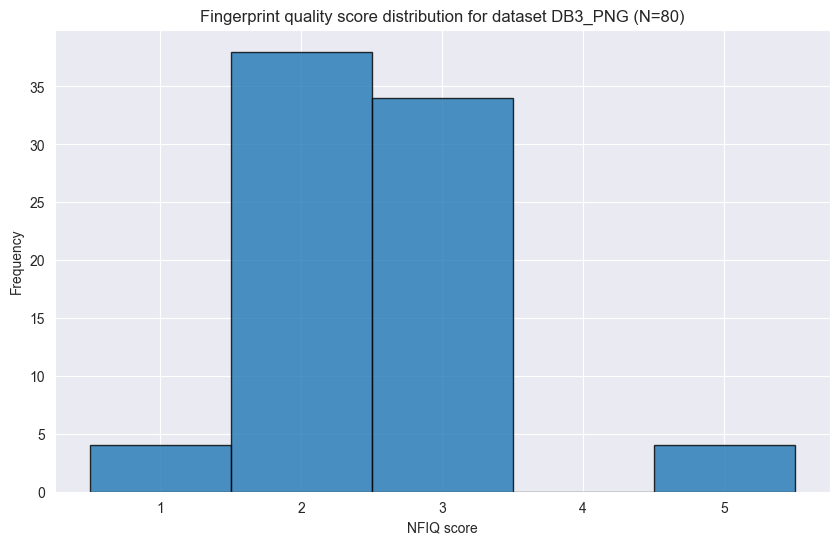

Evaluated DB4_PNG\101_1.png, quality score: 2
Evaluated DB4_PNG\101_2.png, quality score: 2
Evaluated DB4_PNG\101_3.png, quality score: 2
Evaluated DB4_PNG\101_4.png, quality score: 1
Evaluated DB4_PNG\101_5.png, quality score: 2
Evaluated DB4_PNG\101_6.png, quality score: 2
Evaluated DB4_PNG\101_7.png, quality score: 2
Evaluated DB4_PNG\101_8.png, quality score: 2
Evaluated DB4_PNG\102_1.png, quality score: 2
Evaluated DB4_PNG\102_2.png, quality score: 2
Evaluated DB4_PNG\102_3.png, quality score: 2
Evaluated DB4_PNG\102_4.png, quality score: 2
Evaluated DB4_PNG\102_5.png, quality score: 2
Evaluated DB4_PNG\102_6.png, quality score: 2
Evaluated DB4_PNG\102_7.png, quality score: 2
Evaluated DB4_PNG\102_8.png, quality score: 2
Evaluated DB4_PNG\103_1.png, quality score: 2
Evaluated DB4_PNG\103_2.png, quality score: 2
Evaluated DB4_PNG\103_3.png, quality score: 1
Evaluated DB4_PNG\103_4.png, quality score: 1
Evaluated DB4_PNG\103_5.png, quality score: 1
Evaluated DB4_PNG\103_6.png, quali

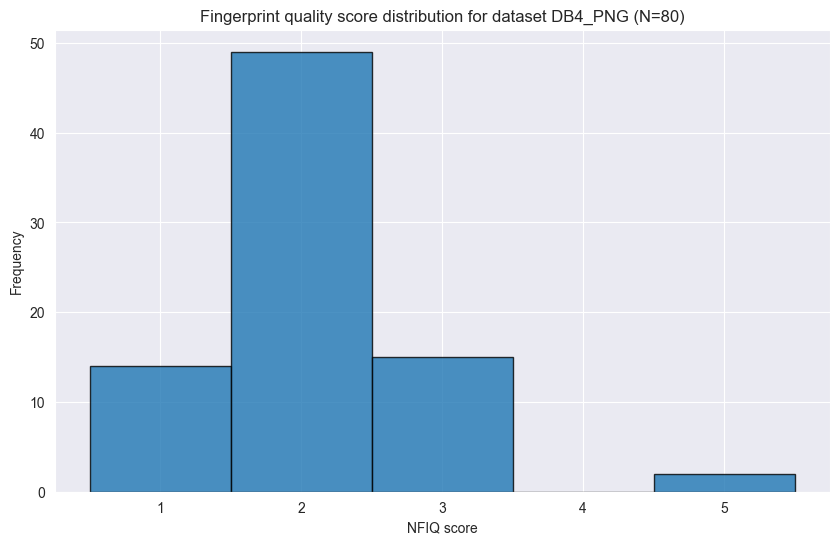

In [7]:
for d in png_dir:
    quality_scores = []
    for f in os.listdir(d):
        if f.endswith(".png"):
            png_path = os.path.join(d, f)
            result = subprocess.run(["nfiq", png_path], capture_output=True, text=True)

            if result.returncode != 0:
                print(f"Error evaluating {png_path}: {result.stderr}")
            else:
                score = int(result.stdout.strip())
                quality_scores.append(score)
                print(f"Evaluated {png_path}, quality score: {score}")

    bins = np.arange(1, 7) - 0.5

    plt.figure(figsize=(10, 6))
    plt.hist(quality_scores, bins=bins, alpha=0.8, edgecolor="black")
    plt.title(f"Fingerprint quality score distribution for dataset {d} (N={len(quality_scores)})")
    plt.xlabel("NFIQ score")
    plt.ylabel("Frequency")
    plt.xticks(range(1, 6))
    plt.grid(True)
    plt.show()

Determine the best threshold for bozorth3 outputs (to distinguish same or different subjects) as accurately as possible. Use an approach of your choosing:
- You can compute FAR, FRR, and then the EER from them

Perform classification and report classification accuracy

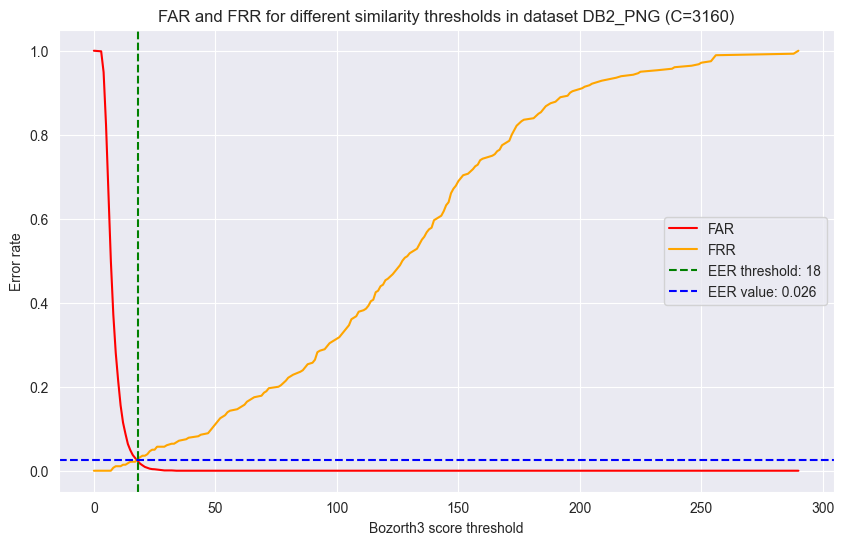

Classification accuracy at EER threshold: 0.976
True positive rate at EER threshold: 0.971
True negative rate at EER threshold: 0.976


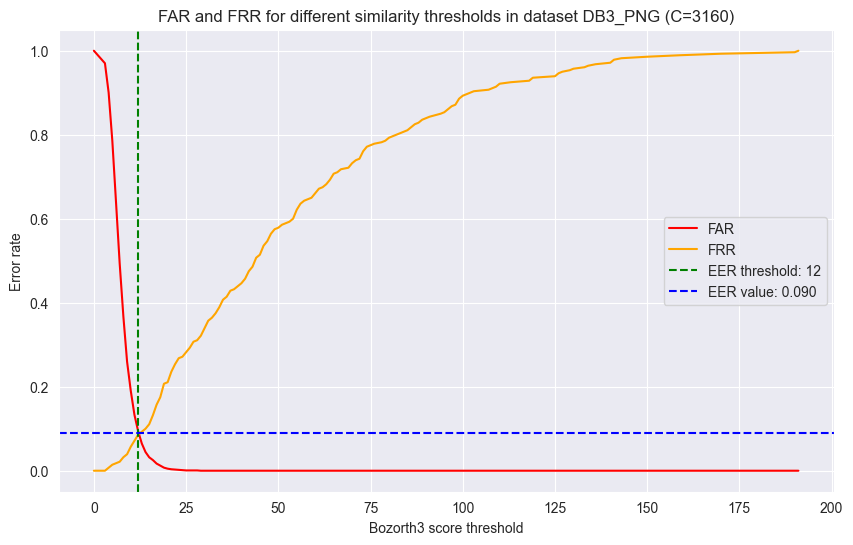

Classification accuracy at EER threshold: 0.907
True positive rate at EER threshold: 0.914
True negative rate at EER threshold: 0.906


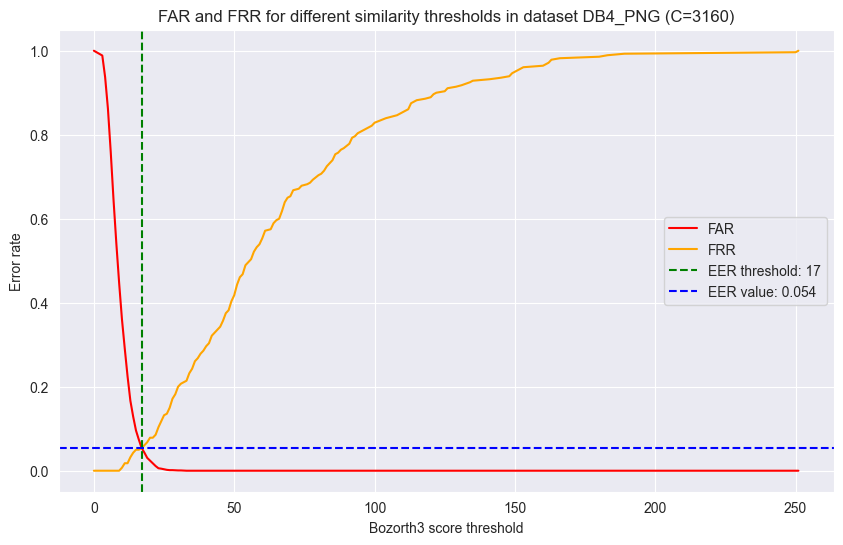

Classification accuracy at EER threshold: 0.946
True positive rate at EER threshold: 0.946
True negative rate at EER threshold: 0.946


In [8]:
for d in png_dir:
    similarity_matrix = np.loadtxt(os.path.join(comparison_dir, f"{d}_similarity_matrix.txt"), dtype=int)
    n_files = similarity_matrix.shape[0]
    genuine_scores = []
    impostor_scores = []

    for i in range(n_files):
        for j in range(i + 1, n_files):
            if i // n_captures == j // n_captures:
                genuine_scores.append(similarity_matrix[i, j])
            else:
                impostor_scores.append(similarity_matrix[i, j])

    combined_scores = genuine_scores + impostor_scores
    distinct_scores = sorted(set(combined_scores))
    thresholds = [0] + distinct_scores + [max(combined_scores) + 1]
    FAR = [] # false acceptance rates
    FRR = [] # false rejection rates
    for t in thresholds:
        false_accepts = sum(1 for score in impostor_scores if score >= t)
        false_rejects = sum(1 for score in genuine_scores if score < t)
        FAR.append(false_accepts / len(impostor_scores))
        FRR.append(false_rejects / len(genuine_scores))
    FAR = np.array(FAR)
    FRR = np.array(FRR)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, FAR, label="FAR", color="red")
    plt.plot(thresholds, FRR, label="FRR", color="orange")
    plt.xlabel("Bozorth3 score threshold")
    plt.ylabel("Error rate")
    plt.title(f"FAR and FRR for different similarity thresholds in dataset {d} (C={len(combined_scores)})")
    plt.legend()
    plt.grid(True)

    EER_index = np.argmin(np.abs(FAR - FRR)) # equal error rate
    EER_threshold = thresholds[EER_index]
    EER_value = float((FAR[EER_index] + FRR[EER_index]) / 2)

    plt.axvline(EER_threshold, color="green", linestyle="--", label=f"EER threshold: {EER_threshold}")
    plt.axhline(EER_value, color="blue", linestyle="--", label=f"EER value: {EER_value:.3f}")
    plt.legend()
    plt.show()

    true_positives = sum(1 for score in genuine_scores if score >= EER_threshold)
    true_negatives = sum(1 for score in impostor_scores if score < EER_threshold)
    CA = (true_positives + true_negatives) / len(combined_scores) # classification accuracy
    TPR = true_positives / len(genuine_scores)
    TNR = true_negatives / len(impostor_scores)
    print(f"Classification accuracy at EER threshold: {CA:.3f}")
    print(f"True positive rate at EER threshold: {TPR:.3f}")
    print(f"True negative rate at EER threshold: {TNR:.3f}")

Modify the classification so that you first classify each fingerprint by its type (A = Arch, L = Left Loop, R = Right Loop, S = Scar, T = Tented Arch, W = Whorl), and then only match within this subgroup. To do this, call pcasys pcasys.prs

Transform the images from PNG to WSG

In [9]:
for d in png_dir:
    wsq_d = d.replace("PNG", "WSQ")
    os.makedirs(wsq_d, exist_ok=True)

    for f in os.listdir(d):
        if not f.endswith(".png"):
            continue

        png_path = os.path.join(d, f)
        gray_path = os.path.join(wsq_d, f.replace(".png", ".gray"))
        wsq_path = os.path.join(wsq_d, f.replace(".png", ".wsq"))

        # png to grayscale
        subprocess.run([ # from png2wsq_example.sh
            "magick", png_path,
            "-resize", "600x600!",
            "-depth", "8",
            "-type", "Grayscale",
            "-compress", "none",
            "-colorspace", "Gray",
            "-strip",
            gray_path
        ], check=True)

        # grayscale to wsq
        subprocess.run([
            "cwsq", "0.75", "wsq", gray_path,
            "-raw_in", "600,600,8,500"
        ], check=True)

        # delete gray
        os.remove(gray_path)
        print(f"Converted {png_path} to {wsq_path}")

Converted DB2_PNG\101_1.png to DB2_WSQ\101_1.wsq
Converted DB2_PNG\101_2.png to DB2_WSQ\101_2.wsq
Converted DB2_PNG\101_3.png to DB2_WSQ\101_3.wsq
Converted DB2_PNG\101_4.png to DB2_WSQ\101_4.wsq
Converted DB2_PNG\101_5.png to DB2_WSQ\101_5.wsq
Converted DB2_PNG\101_6.png to DB2_WSQ\101_6.wsq
Converted DB2_PNG\101_7.png to DB2_WSQ\101_7.wsq
Converted DB2_PNG\101_8.png to DB2_WSQ\101_8.wsq
Converted DB2_PNG\102_1.png to DB2_WSQ\102_1.wsq
Converted DB2_PNG\102_2.png to DB2_WSQ\102_2.wsq
Converted DB2_PNG\102_3.png to DB2_WSQ\102_3.wsq
Converted DB2_PNG\102_4.png to DB2_WSQ\102_4.wsq
Converted DB2_PNG\102_5.png to DB2_WSQ\102_5.wsq
Converted DB2_PNG\102_6.png to DB2_WSQ\102_6.wsq
Converted DB2_PNG\102_7.png to DB2_WSQ\102_7.wsq
Converted DB2_PNG\102_8.png to DB2_WSQ\102_8.wsq
Converted DB2_PNG\103_1.png to DB2_WSQ\103_1.wsq
Converted DB2_PNG\103_2.png to DB2_WSQ\103_2.wsq
Converted DB2_PNG\103_3.png to DB2_WSQ\103_3.wsq
Converted DB2_PNG\103_4.png to DB2_WSQ\103_4.wsq
Converted DB2_PNG\10

You need to edit the text file to contain the list of WSQ images you have.

In [10]:
current_dir = os.getcwd()

for d in png_dir:
    wsq_d = d.replace("PNG", "WSQ")
    list_path = wsq_d.split("_")[0] + "_image_list.txt"

    with open(list_path, "w") as list_file:
        for f in os.listdir(wsq_d):
            if f.endswith(".wsq"):
                absolute_path = os.path.join(current_dir, wsq_d, f)
                nbis_relative_path = "../../../../../" + absolute_path.replace("C:\\", "")
                list_file.write(f"{nbis_relative_path} A\n")

    print(f"Created image list at {list_path}")

Created image list at DB2_image_list.txt
Created image list at DB3_image_list.txt
Created image list at DB4_image_list.txt


Due to issues with pcasys this step was done manually.

```bash
cd a1_support_files
```

Change the `demo_images_list` to a relative path from nbis to the created image list text file:
```bash
pcasys pcasys.prs
copy pcasys.out <output_file>
```

Filter out the class (letter) you get after "hyp"

EER threshold with types: 19
EER value with types: 0.045
Classification accuracy with types: 0.956
True positive rate with types: 0.955
True negative rate with types: 0.956


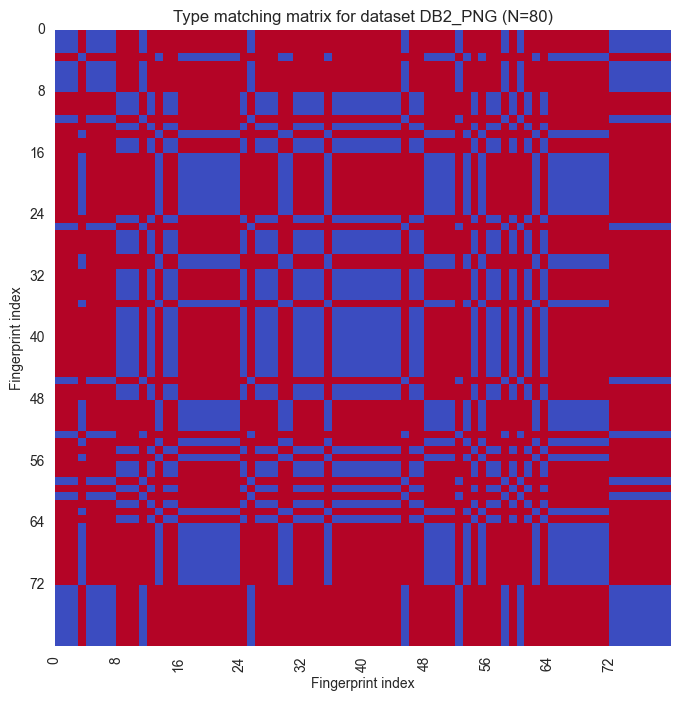

EER threshold with types: 13
EER value with types: 0.090
Classification accuracy with types: 0.908
True positive rate with types: 0.912
True negative rate with types: 0.908


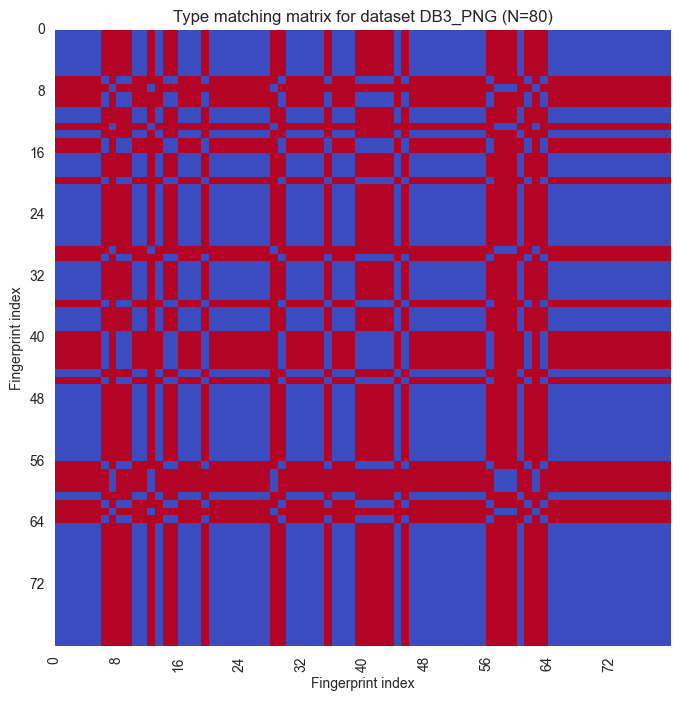

EER threshold with types: 19
EER value with types: 0.055
Classification accuracy with types: 0.946
True positive rate with types: 0.945
True negative rate with types: 0.946


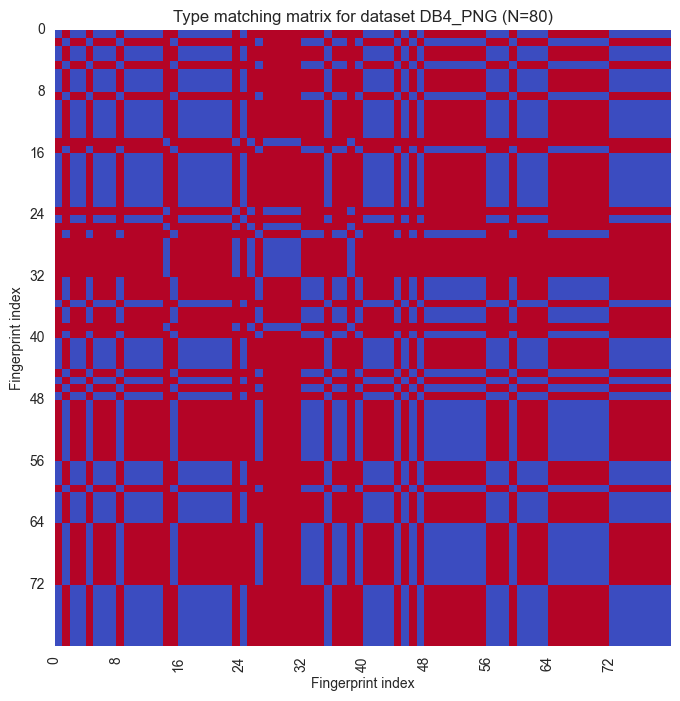

In [11]:
import re

types_dir = "types"

for d in png_dir:
    wsq_d = d.replace("PNG", "WSQ")
    similarity_matrix = np.loadtxt(os.path.join(comparison_dir, f"{d}_similarity_matrix.txt"), dtype=int)
    types = []
    with open(os.path.join(types_dir, f"{wsq_d}_types.out")) as types_file:
        for line in types_file:
            match = re.search(r"hyp\s+([A-Za-z])", line)
            if match:
                types.append(match.group(1))

    types = np.array(types)
    n_files = similarity_matrix.shape[0]
    genuine_scores = []
    impostor_scores = []
    for i in range(n_files):
        for j in range(i + 1, n_files):
            if types[i] != types[j]: # fingerprint types do not match
                impostor_scores.append(similarity_matrix[i, j])
            elif i // n_captures == j // n_captures:
                genuine_scores.append(similarity_matrix[i, j])
            else:
                impostor_scores.append(similarity_matrix[i, j])

    combined_scores = genuine_scores + impostor_scores
    distinct_scores = sorted(set(combined_scores))
    thresholds = [0] + distinct_scores + [max(combined_scores) + 1]
    FAR = [] # false acceptance rates
    FRR = [] # false rejection rates
    for t in thresholds:
        false_accepts = sum(1 for score in impostor_scores if score >= t)
        false_rejects = sum(1 for score in genuine_scores if score < t)
        FAR.append(false_accepts / len(impostor_scores))
        FRR.append(false_rejects / len(genuine_scores))
    FAR = np.array(FAR)
    FRR = np.array(FRR)

    EER_index = np.argmin(np.abs(FAR - FRR)) # equal error rate
    EER_threshold = thresholds[EER_index]
    EER_value = float((FAR[EER_index] + FRR[EER_index]) / 2)
    print(f"EER threshold with types: {EER_threshold}")
    print(f"EER value with types: {EER_value:.3f}")

    true_positives = sum(1 for score in genuine_scores if score >= EER_threshold)
    true_negatives = sum(1 for score in impostor_scores if score < EER_threshold)
    CA_with_types = (true_positives + true_negatives) / len(combined_scores) # classification accuracy
    TPR_with_types = true_positives / len(genuine_scores)
    TNR_with_types = true_negatives / len(impostor_scores)
    print(f"Classification accuracy with types: {CA_with_types:.3f}")
    print(f"True positive rate with types: {TPR_with_types:.3f}")
    print(f"True negative rate with types: {TNR_with_types:.3f}")

    # optional
    types_matrix = np.equal.outer(types, types).astype(int)
    ticks = np.arange(0, similarity_matrix.shape[0], 8)

    plt.figure(figsize=(10, 8))
    sns.heatmap(1 - types_matrix, cmap="coolwarm", cbar=False, square=True)
    plt.title(f"Type matching matrix for dataset {d} (N={n_files})")
    plt.xlabel("Fingerprint index")
    plt.ylabel("Fingerprint index")
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)
    plt.show()